<a href="https://colab.research.google.com/github/suryaprakash078/data-cleaning-using-machine-learning/blob/main/ml_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

messages = [
    "This is a spam message with offers",
    "Buy now and get discount",
    "Meeting at 3 PM tomorrow",
    "Hello, how are you?",
    "Congratulations! You've won a prize",
    "Important update on your account"
]
labels = ['spam', 'spam', 'not spam', 'not spam', 'spam', 'not spam']

cv = CountVectorizer()
X = cv.fit_transform(messages)

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

model = MultinomialNB()
model.fit(X_train, y_train)

user_input = input("Enter your message: ")
input_vec = cv.transform([user_input])
prediction = model.predict(input_vec)

print("Prediction:", prediction[0])

Enter your message: hello how are you
Prediction: not spam


Saving cicids_2000_sample (1).csv to cicids_2000_sample (1) (4).csv
   Flow_ID       Source_IP   Destination_IP  Source_Port  Destination_Port  \
0        1  160.108.65.105   182.65.120.208        59153             53436   
1        2   205.187.166.9   171.190.154.59        35981             27167   
2        3    170.41.254.3  139.168.127.233        64351             47823   
3        4   164.14.95.100    104.241.29.70        51589             63260   
4        5  208.94.234.211   59.193.221.165        37842             47054   

  Protocol  Flow_Duration  Total_Fwd_Packets  Total_Backward_Packets  \
0      UDP        1939157                194                      66   
1      TCP        4737968                228                      98   
2      TCP        5600254                181                     171   
3      UDP        3840063                171                      89   
4      UDP        2368660                118                      78   

   Flow_Bytes_s  Flow_Packets_

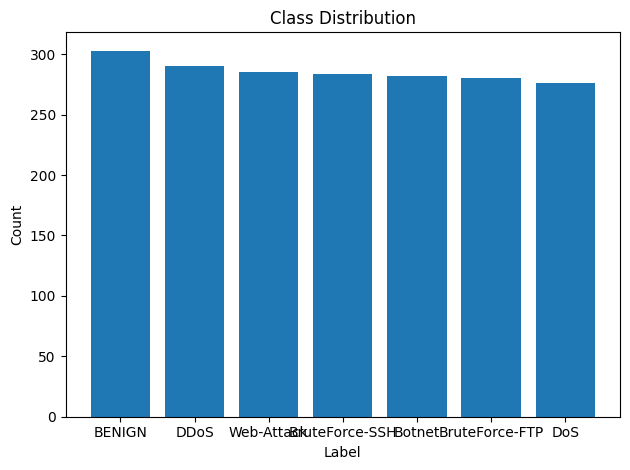

Accuracy: 0.1275
Confusion Matrix:
 [[ 5  6 26  5  2  1  4]
 [ 3  6 27  5  3  5  3]
 [ 6  7 26  4  2  2  3]
 [ 4  9 27  4  4  4  3]
 [ 2  4 41  4  3  7  1]
 [ 7 15 34  4  5  2  1]
 [ 5  6 42  0  2  4  5]]


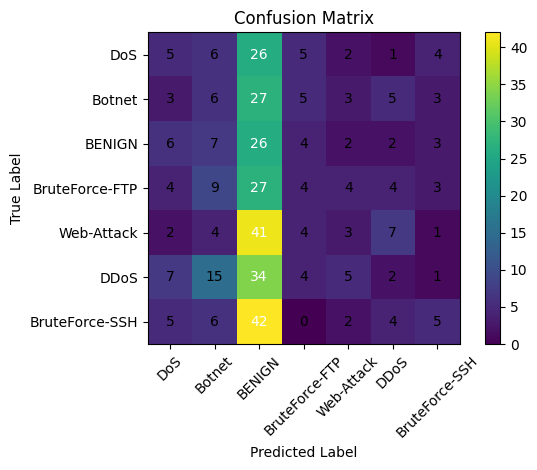

ROC curve skipped (more than 2 classes).


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print(df.head())
print(df.columns)

label_counts = df['Label'].value_counts()
plt.figure()
plt.bar(label_counts.index, label_counts.values)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert each row of the DataFrame into a single string for TF-IDF vectorization
X_train_text = X_train.astype(str).agg(' '.join, axis=1)
X_test_text = X_test.astype(str).agg(' '.join, axis=1)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
acc = accuracy_score(y_test, predictions)
print("Accuracy:", acc)

def check_spam(msg):
    # The example function check_spam is not relevant for this dataset
    # and would require an actual text input similar to the original problem.
    # For this network traffic dataset, a direct string input is not suitable
    # unless a specific column or combination of columns is treated as text.
    # For demonstration, we'll keep it but acknowledge it's not directly applicable
    # to the current dataset's features unless a similar text transformation is applied.
    # For instance, if 'msg' was a concatenated string of features from a single new flow.
    return "Prediction not applicable to example due to data type mismatch"



cm = confusion_matrix(y_test, predictions, labels=y.unique())
print("Confusion Matrix:\n", cm)

plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(y.unique()))
plt.xticks(tick_marks, y.unique(), rotation=45)
plt.yticks(tick_marks, y.unique())

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j],
                 ha="center", va="center",
                 color="white" if cm[i,j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

if len(y.unique()) == 2:
    y_test_binary = (y_test == y.unique()[1]).astype(int)
    y_prob = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.3f})")
    plt.plot([0,1],[0,1],'--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()
else:
    print("ROC curve skipped (more than 2 classes).")